In [1]:
import numpy as np
import os.path as osp
import matplotlib.pylab as plt
import sys
sys.path.insert(0, "/home/ubuntu")

# from latent_3d_points.src.point_net_ae import PointNetAutoEncoder
# from latent_3d_points.src.autoencoder import Configuration as Conf
# from latent_3d_points.src.neural_net import MODEL_SAVER_ID

from latent_3d_points.src.in_out import snc_category_to_synth_id, create_dir, PointCloudDataSet, \
                                        load_all_point_clouds_under_folder, pickle_data, unpickle_data

from latent_3d_points.src.general_utils import plot_3d_point_cloud
# from latent_3d_points.src.tf_utils import reset_tf_graph

# from latent_3d_points.src.vanilla_gan import Vanilla_GAN
# from latent_3d_points.src.w_gan_gp import W_GAN_GP
# from latent_3d_points.src.generators_discriminators import latent_code_discriminator_two_layers,\
# latent_code_generator_two_layers

In [2]:
# class_name = input('Give me the class name (e.g. "chair"): ').lower()
class_name = "chair"

In [3]:
top_in_dir = '../data/shape_net_core_uniform_samples_2048/'    

ae_configuration = '../data/single_class_ae/configuration'
syn_id = snc_category_to_synth_id()[class_name]
class_dir = osp.join(top_in_dir , syn_id)
all_pc_data = load_all_point_clouds_under_folder(class_dir, n_threads=8, file_ending='.ply', verbose=True)

6778 pclouds were loaded. They belong in 1 shape-classes.


In [4]:
from sklearn.cluster import KMeans

In [5]:
def sort_points(all_points, kmeans):
    points = None
    for i in range(6):
        cluster =  all_points[kmeans.labels_ == i]
        pts = cluster[cluster[:,2].argsort()]
        if type(points) is not np.ndarray:
            points = pts
        else:
            points = np.concatenate((points,pts),axis=0)
    return points

In [6]:
def gen_dataset(num_pcs, num_points_removed):
    all_pc_data = load_all_point_clouds_under_folder(class_dir, n_threads=8, file_ending='.ply', verbose=True)
    batch = all_pc_data.next_batch(num_pcs)
    L = batch[0] # L is a list of chairs now
    print(L.shape)
    labels = batch[1]
    incomplete_set = []
    for i in range(len(L)):
        if i%100 ==0:
            print(i)
        kmeans = KMeans(n_clusters=6).fit(L[i])
        sorted_points = sort_points(L[i], kmeans)
        incomplete = sorted_points[num_points_removed:]
        incomplete_set.append(incomplete)
    incomplete_set = np.array(incomplete_set)
    incomplete_pc_data = PointCloudDataSet(point_clouds=incomplete_set, labels=labels, init_shuffle=False)
    pickle_data('incomplete_data', incomplete_pc_data)
    pickle_data('complete_data', all_pc_data)

In [7]:
# gen_dataset(6778, 100)

(21, 3996, 3)


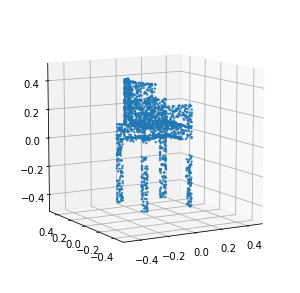

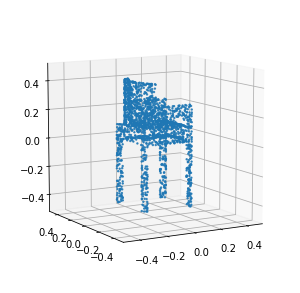

In [18]:
data1 = unpickle_data('/home/ubuntu/latent_3d_points/data/missing_points_dataset/val_data.pkl')
incomplete_pc_data = next(data1)
L3 = incomplete_pc_data.next_batch(21)[0]

print(L3.shape)


L1_prime = L3[:, :1948, :]
L2_prime = L3[:, 1948:, :]


i = 0
plot_3d_point_cloud(L1_prime[i][:, 0], L1_prime[i][:, 1], L1_prime[i][:, 2], in_u_sphere=True);
plot_3d_point_cloud(L2_prime[i][:, 0], L2_prime[i][:, 1], L2_prime[i][:, 2], in_u_sphere=True);







In [9]:
data1 = unpickle_data('/home/ubuntu/latent_3d_points/data/missing_points_dataset/incomplete_data')
incomplete_pc_data = next(data1)
data2 = unpickle_data('/home/ubuntu/latent_3d_points/data/missing_points_dataset/complete_data')
complete_pc_data = next(data2)


In [10]:
L = incomplete_pc_data.point_clouds
L2 = complete_pc_data.point_clouds
print(L.shape)
print(L2.shape)

L3 = np.concatenate((L, L2), axis=1)
perm = np.arange(L3.shape[0])
np.random.shuffle(perm)
L3 = L3[perm]



labels = incomplete_pc_data.labels[perm]



(6778, 1948, 3)
(6778, 2048, 3)


In [11]:
print(L3.shape)

num_train = int(L3.shape[0] * 0.8)
num_val = int(L3.shape[0] * 0.1)
num_test = L3.shape[0] - num_train - num_val

print(num_train)
print(num_val)
print(num_test)

train_data = PointCloudDataSet(point_clouds=L3[:num_train], labels=labels[:num_train], init_shuffle=False)
val_data = PointCloudDataSet(point_clouds=L3[num_train:num_train+num_val], labels=labels[num_train:num_train+num_val], init_shuffle=False)
test_data = PointCloudDataSet(point_clouds=L3[num_train+num_val:], labels=labels[num_train+num_val:], init_shuffle=False)

print(train_data.point_clouds.shape)
print(val_data.point_clouds.shape)
print(test_data.point_clouds.shape)


pickle_data('/home/ubuntu/latent_3d_points/data/missing_points_dataset/train_data.pkl', train_data)
pickle_data('/home/ubuntu/latent_3d_points/data/missing_points_dataset/val_data.pkl', val_data)
pickle_data('/home/ubuntu/latent_3d_points/data/missing_points_dataset/test_data.pkl', test_data)


print(1/0)




L1_prime = L3[:, :1948, :]
L2_prime = L3[:, 1948:, :]


i = 50
plot_3d_point_cloud(L1_prime[i][:, 0], L1_prime[i][:, 1], L1_prime[i][:, 2], in_u_sphere=True);
plot_3d_point_cloud(L2_prime[i][:, 0], L2_prime[i][:, 1], L2_prime[i][:, 2], in_u_sphere=True);





(6778, 3996, 3)
5422
677
679
(5422, 3996, 3)
(677, 3996, 3)
(679, 3996, 3)


ZeroDivisionError: integer division or modulo by zero

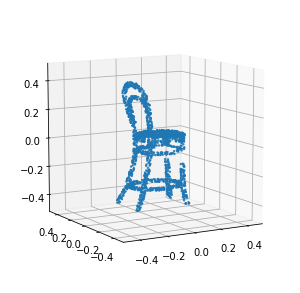

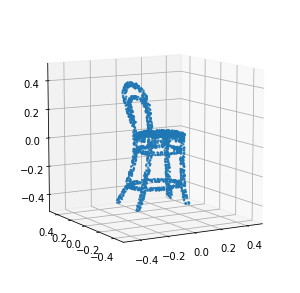

In [9]:
i = 70

# data1.point_clouds[0]
L = incomplete_pc_data.point_clouds
plot_3d_point_cloud(L[i][:, 0], L[i][:, 1], L[i][:, 2], in_u_sphere=True);

L = complete_pc_data.point_clouds
plot_3d_point_cloud(L[i][:, 0], L[i][:, 1], L[i][:, 2], in_u_sphere=True);

In [10]:
print(incomplete_pc_data)
print(complete_pc_data)

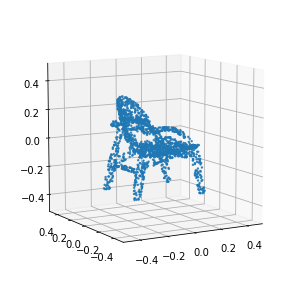

(1948,)


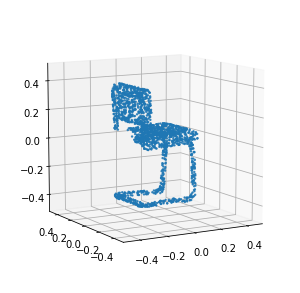

In [11]:
batch = incomplete_pc_data.next_batch(21, seed=0) # batch is a tuple of chair list, id list, None
L = batch[0] # L is a list of chairs now
labels = batch[1]
i = 1
plot_3d_point_cloud(L[i][:, 0], L[i][:, 1], L[i][:, 2], in_u_sphere=True);

print(L[i][:, 0].shape)
i = 15
plot_3d_point_cloud(L[i][:, 0], L[i][:, 1], L[i][:, 2], in_u_sphere=True);

In [12]:
batch = complete_pc_data.next_batch(21, seed=0) # batch is a tuple of chair list, id list, None
L = batch[0] # L is a list of chairs now
labels = batch[1]
i = 1
plot_3d_point_cloud(L[i][:, 0], L[i][:, 1], L[i][:, 2], in_u_sphere=True);

print(L[i][:, 0].shape)
i = 15
plot_3d_point_cloud(L[i][:, 0], L[i][:, 1], L[i][:, 2], in_u_sphere=True);

('seed: ', 0)


ZeroDivisionError: integer division or modulo by zero

In [ ]:
# batch = all_pc_data.next_batch(21) # batch is a tuple of chair list, id list, None
# L = batch[0] # L is a list of chairs now
# labels = batch[1]
# i = 0
# plot_3d_point_cloud(L[i][:, 0], L[i][:, 1], L[i][:, 2], in_u_sphere=True);
# i = 20
# plot_3d_point_cloud(L[i][:, 0], L[i][:, 1], L[i][:, 2], in_u_sphere=True);

In [ ]:
# kmeans = KMeans(n_clusters=6).fit(L[0])
# kmeans.labels_

In [ ]:
# l1 = L[0][kmeans.labels_!=2]
# plot_3d_point_cloud(l1[:, 0], l1[:, 1], l1[:, 2], in_u_sphere=True);

In [ ]:
# points = None
# for i in range(6):
#     cluster =  L[0][kmeans.labels_ == i]
#     pts = cluster[cluster[:,2].argsort()]
#     if type(points) is not np.ndarray:
#         points = pts
#     else:
#         points = np.concatenate((points,pts),axis=0)

In [ ]:
# print(points)

In [ ]:
# n = points.shape[0] - 100
# plot_3d_point_cloud(points[:n, 0], points[:n, 1], points[:n, 2], in_u_sphere=True)